# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Jesus Armando Cañas Gamboa
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, newton, bisect

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

In [3]:
def f(E):
    #Definimos los parametros
    t0 = 1986.1113
    T = 75.96000
    t = 1986 + 90/365 #Ya que el primero de abril han pasado 90 dias
    M = (2* np.pi/T) * (t-t0) # Calculamos M 

    e = 0.9672671 # exentricidad 
    return E - e * np.sin(E)- M 

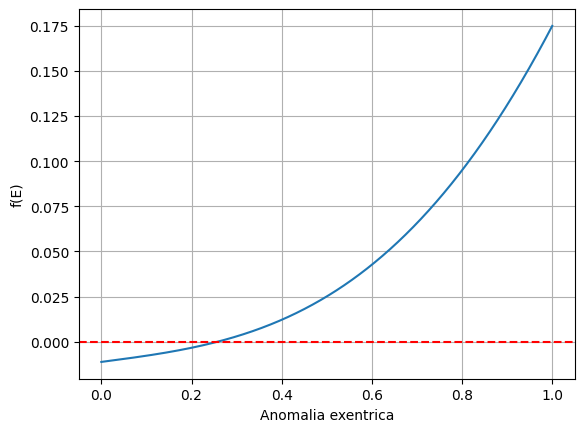

In [4]:
# Hacemos una grafica
E = np.linspace(0,1,1000)
plt.plot(E,f(E))
plt.xlabel('Anomalia exentrica')
plt.axhline(y = 0, color = 'red',linestyle='--')# En este valor encontraremos el valor real de E
plt.ylabel('f(E)')
plt.grid()

In [5]:
# Usaremos el metodo de la bisección

def bisect(f, a ,b, tol = 1e-10, max_iter= 100000):
    if f(a)*f(b) >= 0 : #Miramos el signo
        raise ValueError('el intervalo es incorrecto')
    else:
        #Iniciamos un ciclo que nos calcule el valor 
        for _ in range(max_iter):
            c = (a+b) / 2 #Calculamos el punto medio
            if abs(f(c))< tol: #Miramos si es la raiz
                return c #Si es la raiz retornamos
            if f(c)*f(a) < 0: #Si no definimos un nuevo intervalo
                b = c
            else:
                a = c
        raise RuntimeError('Maximo de iteraciones alcanzado')

In [6]:
bisect(f,0.2,0.4)


0.25777013599872584

In [7]:
#Definimos M(t)
def M(t):
    T = 75.96000
    return 2 * np.pi/T *( t - 1986.1113)

In [8]:
#Definimos el metodo de Newton Rapson

def kepler_newton(M, tol=1e-10, N=100):
    E = M #Empezamos en un valor
    e = 0.9672671 
    #Realizamos el metodo
    for _ in range(N):
        f = E - e * np.sin(E) - M #Definimos la funcion
        df = 1 - e * np.cos(E) #Definimos la derivada
        #Miramos si la derivada es distinta de cero
        if df == 0:
            raise ZeroDivisionError("Derivada nula.")
        #Calculamos un nuevo valor
        E_1 = E - f / df
        #Miramos si la diferencia de los valores comple con la tolerancia
        if abs(E_1 - E) < tol:
            return E_1
        #Si no actualizamos
        E = E_1
    raise RuntimeError("Maximo de iteraciones")

In [9]:
def secante_Kepler(M, tol=1e-10, N=100):
    E0 = M
    E = M + 0.5      #Empezamos con unos valores 
    e = 0.967267
    for _ in range(N):#Inicializamos el ciclo
        f = lambda E :E - e * np.sin(E) - M #Definimos la funcion
        E1 = E - f(E) *(E - E0)/ (f(E)- f(E0)) #Calculamos un valor
        #Miramos si la diferancia cumple con la tolerancia
        if abs(E1 - E) < tol:
            return E1
        #Actualizamos
        E0 = E
        E = E1
        

In [10]:
T = 75.96 #Definimos el perido
Periodo = np.arange(0,T,T/100) # Creamos un array donde estaran los valores de tiempo

#Vamos a crear dos listas una para cada metodos
Grafica_Newton_Rapson = []
Grafica_secante = []

for t in Periodo:
    Grafica_Newton_Rapson.append(kepler_newton(M(t)))
    Grafica_secante.append(secante_Kepler(M(t)))

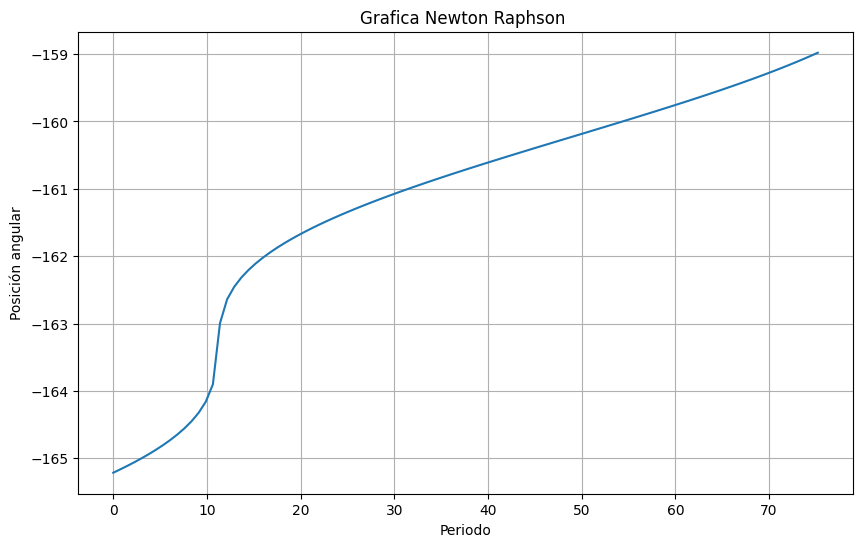

In [13]:
#Grafica de Newton Rapson

plt.figure(figsize = (10,6))
plt.title('Grafica Newton Raphson ')
plt.plot(Periodo, Grafica_Newton_Rapson)
plt.xlabel('Periodo(años)')
plt.ylabel('Anomlia excentrica')
plt.grid()
plt.show()


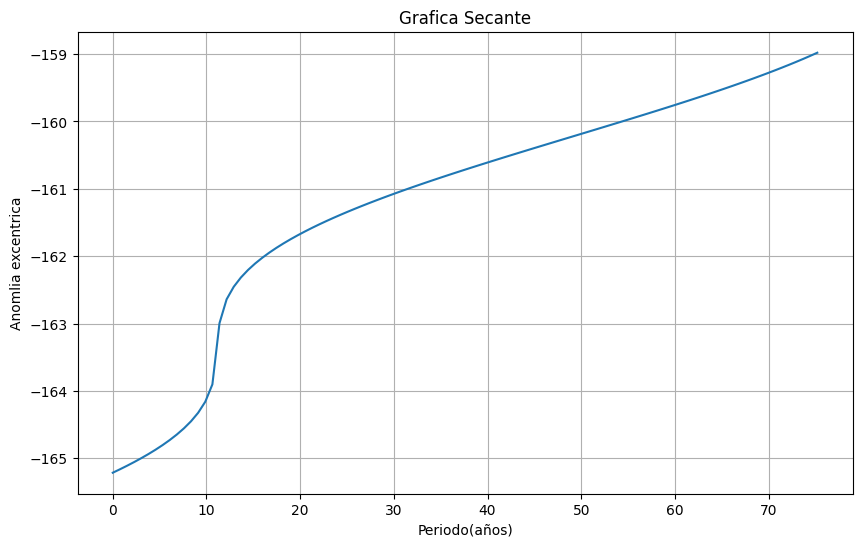

In [15]:
#Grafica de secante

plt.figure(figsize = (10,6))
plt.title('Grafica Secante')
plt.plot(Periodo, Grafica_secante)
plt.xlabel('Periodo(años)')
plt.ylabel('Anomlia excentrica')
plt.grid()
plt.show()

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [34]:
#Definimos la función adecuada para aplicar los metodos 
def f(m,T=0.5):
    return m - m * np.tanh(m / T)
    

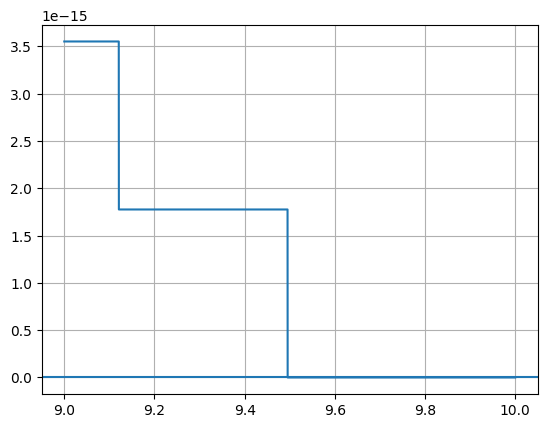

In [59]:
M = np.linspace(9,10,2000000)
plt.plot(M ,f(M))
#plt.xticks(np.arange(0,1,0.1))
plt.axhline(y = 0)
plt.grid()

In [68]:
print(f'{newton(f,1):.4f} Magnetización reducida usando newton raphson')

9.7358 Magnetización reducida usando newton raphson


In [77]:
def Punto_fijo(g, x0, tol=1e-8, max_iter=100):
    """
    Encuentra la raíz de una función utilizando el método de punto fijo.

    Parámetros
    ----------
    g : function
        Función g(x) tal que x = g(x).
    x0 : float
        Valor inicial de la iteración.
    tol : float, optional
        Tolerancia para la convergencia. Por defecto es 1e-6.
    max_iter : int, optional
        Número máximo de iteraciones. Por defecto es 100.

    Devuelve
    -------
    float
        Raíz de la función.
    list
        Lista de valores de x en cada iteración.

    Lanza
    ------
    ValueError
        Si no se encuentra la raíz después de max_iter iteraciones.
    """
    #xs = [x0]  # Inicializa la lista de valores de x con el valor inicial
    for n in range(1, max_iter + 1):  # Itera hasta max_iter veces
        x1 = g(x0)  # Calcula el siguiente valor de x
        #xs.append(x1)  # Agrega el nuevo valor de x a la lista
        if abs(x1 - x0) < tol:  # Verifica si se ha alcanzado la convergencia
            return x1#, xs  # Devuelve la raíz y la lista de valores de x
        x0 = x1  # Actualiza el valor de x para la siguiente iteración

    raise ValueError(f'No se encontró la raíz después de {max_iter} iteraciones.')  # Lanza una excepción si no se encuentra la raíz

In [78]:
g = lambda m : np.tanh(2*m) #Definimos g(x)

In [80]:
print(f'{Punto_fijo(g,9.7):.4f} Magnetización reducida usando punto fijo')

0.9575 Magnetización reducida usando punto fijo


In [85]:
T = np.linspace(0.1,0.99,100)


valores_M = [] #Hacemos una lista con los valores de M

for t in T:
    def g(m,T = t):
        return np.tanh(m/T)#Calculamos g para cada valor de T
    valores_M.append(Punto_fijo(g,2,max_iter=100000)) #Los agregamos a la lista


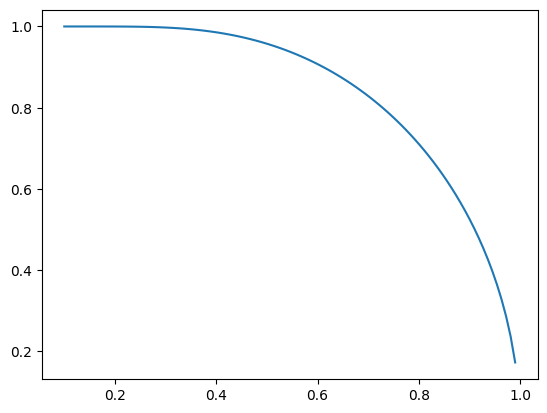

In [86]:
plt.plot(T,valores_M) #Hacemos la grafica

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [69]:
def G(T): #Definimos G en funcion de la temperatura, igualada a 0, para el valor que queremos encontrar
    R = 8.314 # J/K
    T0 = 4.444 # J/K
    return 1e5- R * T * np.log((T/T0)**2.5)
    
    

In [70]:
#Aplicamos el metodo de biseccion
def bisección_Temperatura(a,b,G, tol = 1e-12, Max_iter = 1000):
    if G(a)*G(b)>=0:
        raise ValueError('El intervalo no contiene el cero')
    else:
        for _ in range(Max_iter):
            c = (a+b)/2
            if abs(G(c))< tol:
                return c
            if G(a)*G(c)<0:
                b = c
            else:
                a= c
        raise RuntimeError('Maximo de iteraciones alcanzado')

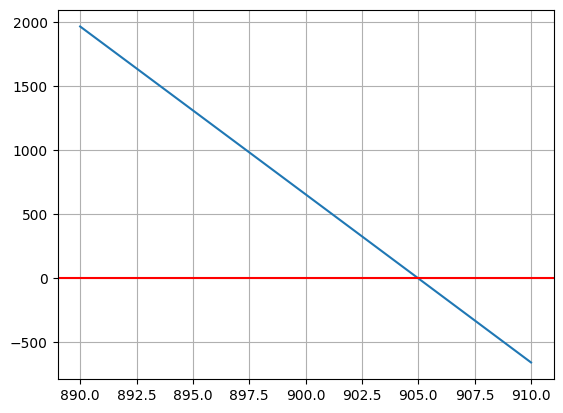

In [88]:
#Hacemos un grafico para ubicarnos
T = np.linspace(890,910,10)
plt.plot(T, G(T))
plt.axhline(y=0, color = 'red')
plt.grid()

In [90]:
#Calculamos la temperatura para la cual G = 10^5
bisección_Temperatura(890,910,G)

904.9743413388665

# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

In [87]:
#Definimos cada función como se indica en el enunciado
I = lambda x : (np.sin(x)/x)**2 
dI =lambda x :  (2/x) * (np.cos(x) - (np.sin(x) / x)) * np.sin(x)/x

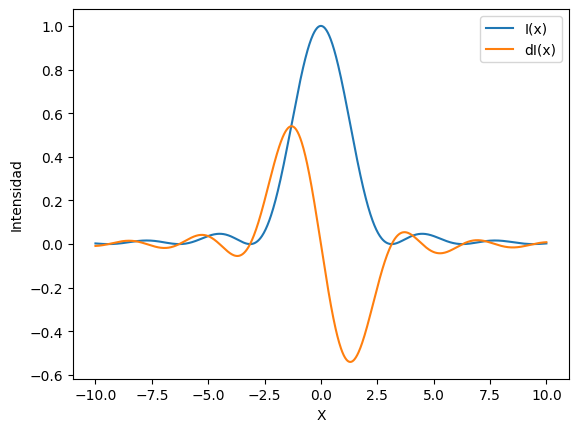

In [88]:
#Hacemos la grafica
x = np.linspace(-10,10,1000)
plt.plot(x,I(x), label= 'I(x)')
plt.plot(x,dI(x), label = 'dI(x)')
plt.xlabel('X')
plt.ylabel('Intensidad')
plt.legend()
plt.show()

In [89]:
#Definimos I de tal manera que quede igualada a 0
I_1 = lambda x : (np.sin(x)/x)**2 - 1/2

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15592\3239965992.py:2: RuntimeWarning: invalid value encountered in divide
  I_1 = lambda x : (np.sin(x)/x)**2 - 1/2


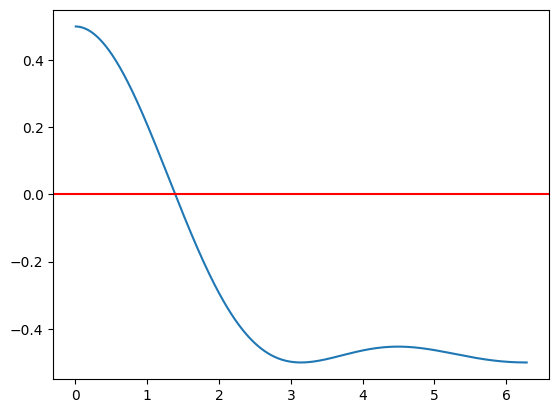

In [94]:
x = np.linspace(0,np.pi*2,1000)
plt.plot(x, I_1(x))
plt.axhline(y = 0, color = 'red')

In [95]:
newton(I_1,np.pi,x1 = np.pi/2,maxiter=100000)

1.391557378251511

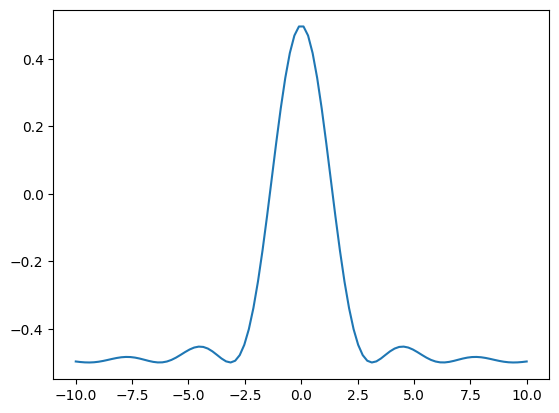

In [6]:
x = np.linspace(-10,10,100)
plt.plot(x,I_1(x))

In [11]:
def sec_difraccion_1(x, f, tol = 1e-12, Max_iter = 1000000000):
    x0 = x - 1 # Le hacemos una modificación al metodo para que tenga un intervalo valido
    x1 = x + 1
    for _ in range(Max_iter):
        f_x1 = f(x1)
        f_x0 = f(x0)
        if f_x1 - f_x0 == 0:
            raise ValueError("f(x1) - f(x0) es cero, el método no puede continuar.")

        # Fórmula de la secante
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Verificar la condición de convergencia
        if abs(x2 - x1) < tol:
            return x2
        # Actualizar los valores para la siguiente iteración
        x0 = x1
        x1 = x2

    raise RuntimeError("El método no convergió en el número máximo de iteraciones.")

In [13]:
valores = np.linspace(-10,10,20) #Creamos los valores donde vamos a anlizar la convergencia
maximos_locales = [] #Hacemis un array para los maximos
for x in valores: #Calculamos los maximos
    maximos_locales.append(sec_difraccion_1(x,dI)) #Los guardamos en un array
print(maximos_locales)#Los imprimimos

[-15.707963267948966, -7.725251836937707, -7.725251836937707, -10.904121659428899, -34.55751918948773, -4.493409457909064, -7.725251836937707, -3.141592653589793, -4.493409457909064, 1.587741321935638e-09, -4.600286381077059e-11, 4.493409457909064, 3.141592653589793, 4.493409457909064, 10.904121659428899, 6.283185307179586, 7.725251836937707, 3.141592653589793, 9.42477796076938, 10.904121659428899]


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

In [11]:
# Constantes físicas
h = 6.626e-34       # Constante de Planck (J·s)
k_B = 1.381e-23     # Constante de Boltzmann (J/K)
c = 2.998e8         # Velocidad de la luz (m/s)

def u_lambda_T(lamb, T):
    """
    Calcula u(λ, T) según la forma simplificada de la ley de Planck.
    
    Parámetros:
        lamb : longitud de onda (m)
        T    : temperatura (K)
    
    Retorna:
        u    : densidad espectral (W·sr⁻¹·m⁻³)
    """
    lambda_0 = h * c / (k_B * T)
    x = lamb / lambda_0
    K = (8 * np.pi * k_B * T) / (lambda_0**4)
    
    exponente = np.exp(1 / x)
    u = K / (x**5 * (exponente - 1))
    
    return u


In [12]:
def du_dlambda(lamb, T):
    """
    Calcula la derivada ∂u/∂λ para la ley de Planck.

    Parámetros:
        lamb : longitud de onda (m)
        T    : temperatura (K)
    
    Retorna:
        du/dλ : derivada de la densidad espectral respecto a λ
    """
    lambda_0 = h * c / (k_B * T)
    x = lamb / lambda_0
    K = (8 * np.pi * k_B * T) / (lambda_0**4)
    
    numerador = 5 * x + (1 - 5 * x) * np.exp(1 / x)
    denominador = x**7 * (np.exp(1 / x) - 1)**2
    
    dudlambda = K * lambda_0 * numerador / denominador
    
    return dudlambda


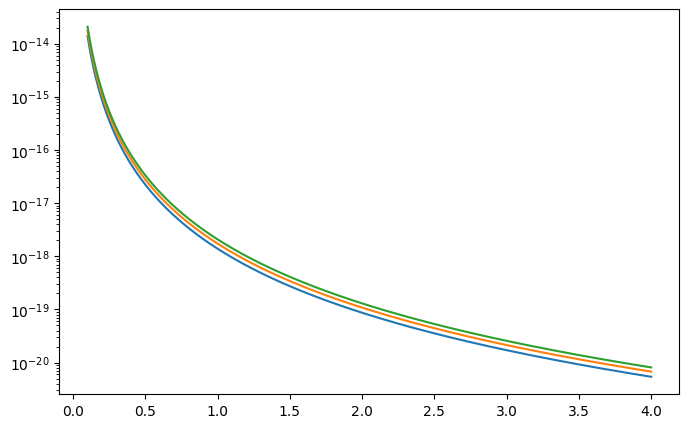

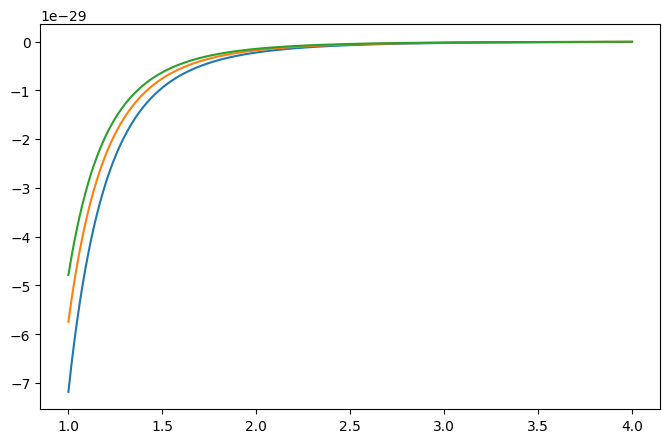

In [13]:
T = np.arange(4000,7000,1000)
lamb = np.linspace(0.1,4,1000000)

plt.figure(figsize=(8, 5))
for t in T:
    plt.plot(lamb,u_lambda_T(lamb,t))
    plt.yscale('log')
    
lamb = np.linspace(1,4,1000)
plt.figure(figsize=(8, 5))
for t in T:
    plt.plot(lamb,du_dlambda(lamb,t))


- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.


In [28]:
def du_dlambda_1(lamb, T=5778):
    """
    Calcula la derivada ∂u/∂λ para la ley de Planck.

    Parámetros:
        lamb : longitud de onda (m)
        T    : temperatura (K)
    
    Retorna:
        du/dλ : derivada de la densidad espectral respecto a λ
    """
    lambda_0 = h * c / (k_B * T)
    x = lamb / lambda_0
    K = (8 * np.pi * k_B * T) / (lambda_0**4)
    
    numerator = 5 * x + (1 - 5 * x) * np.exp(1 / x)
    denominator = x**7 * (np.exp(1 / x) - 1)**2
    
    dudlambda = K * lambda_0 * numerator / denominator
    
    return dudlambda
# Usamos bisect sobre un rango válido (en metros)
# Usa valores dentro del rango donde cambia de signo
raiz = bisect(du_dlambda_1, 4e-7, 8e-7)  # ejemplo en 400–800 nm

print(f"Máximo de u(λ,T) ocurre en λ ≈ {raiz*1e9:.2f} nm")

Máximo de u(λ,T) ocurre en λ ≈ 501.40 nm


- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

In [34]:
print(f'$\\lambda_{{\\mathrm{{max}}}} T \\approx$ {raiz * 5778:.2e} m·K')


$\lambda_{\mathrm{max}} T \approx$ 2.90e-03 m·K


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

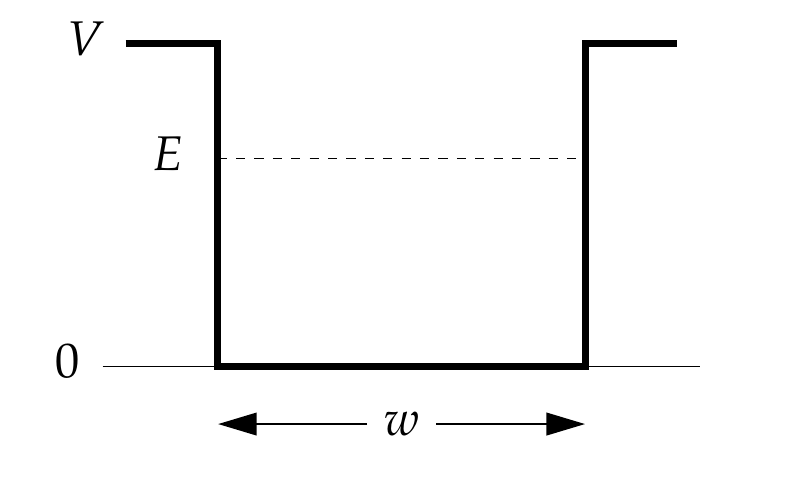

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} = 
\begin{cases} 
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21540\3986528129.py:9: RuntimeWarning: divide by zero encountered in divide
  y2 = lambda E : np.power((V - E)/E,0.5)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21540\3986528129.py:10: RuntimeWarning: divide by zero encountered in divide
  y3 = lambda E : -np.power((V - E)/E,0.5)


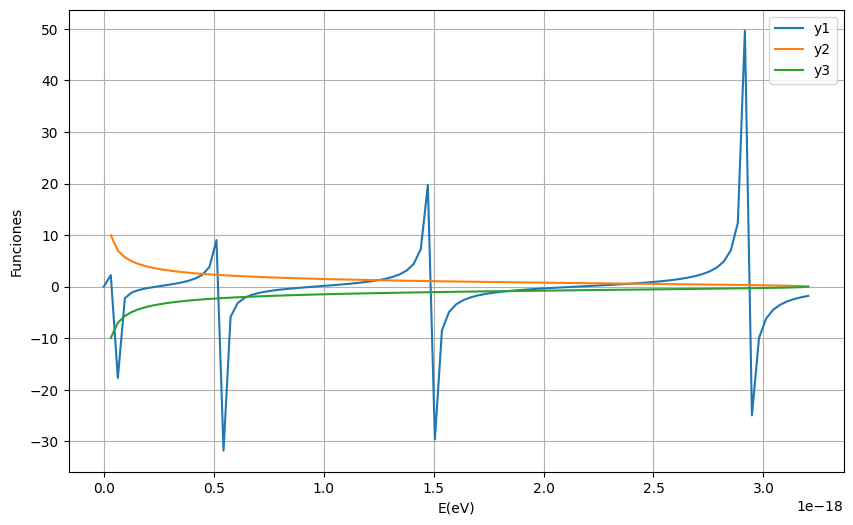

In [17]:
#Comenzamos definiendo las funciones
w = 1e-9#nm
V = 20*1.602e-19#J
m = 9.11e-31 #Kg
h = 1.05e-34 #J


y1 = lambda E : np.tan(((w**2 * m * E)/(2 * h**2))**0.5)
y2 = lambda E : np.power((V - E)/E,0.5)
y3 = lambda E : -np.power((V - E)/E,0.5)

#Hacemos una array para E
E = np.linspace(0,20*1.602e-19,101)

#Graficamos para cada funcion
plt.figure(figsize=(10,6))
plt.plot(E,y1(E), label = 'y1')
plt.plot(E,y2(E), label = 'y2')
plt.plot(E,y3(E), label = 'y3')
plt.xlabel('E(eV)')
plt.ylabel('Funciones')
plt.grid()
plt.legend()
plt.show()


In [18]:
par = lambda E : y1(E) - y2(E) #Definimos las funciones para las energias de niveles pares e impares
impar = lambda E : y1(E) - y3(E)

In [24]:
niveles_de_energia = {}
#0
niveles_de_energia['1'] = bisect(par,0.4e-19,0.55e-19,tol = 0.001*1.602e-19,max_iter=1000000)
#2
niveles_de_energia['2'] = bisect(impar,0.7e-19,0.1e-18,tol = 0.001*1.602e-19,max_iter=1000000)
#3
niveles_de_energia['3'] = bisect(par,1e-19,1.4e-18,tol = 0.001*1.602e-19,max_iter=1000000)
#4
niveles_de_energia['4'] = bisect(impar,1.5e-18,2e-18,tol = 0.001*1.602e-19,max_iter=1000000)
#5
niveles_de_energia['5'] = bisect(par,2e-18,2.5e-18,tol = 0.001*1.602e-19,max_iter=1000000)
#6
niveles_de_energia['6'] = bisect(impar,2.5e-18,3e-18,tol = 0.001*1.602e-19,max_iter=1000000)

RuntimeError: Maximo de iteraciones alcanzado

In [25]:
print(niveles_de_energia) #Imprimimos para cada nivel de energia

{}


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [2]:
# Constantes físicas
G = 6.674e-11        # Constante de gravitación universal [m^3 kg^-1 s^-2]
M = 5.974e24         # Masa de la Tierra [kg]
m = 7.348e22         # Masa de la Luna [kg]
R = 3.844e8          # Distancia Tierra-Luna [m]
omega = 2.662e-6     # Velocidad angular de la Luna [s^-1]
def distancia_r(r):
    term_1 = G*M/r**2
    term_2 = G * m /(R - r)**2
    term_3 = omega**2 * r
    return term_1 - term_2 - term_3

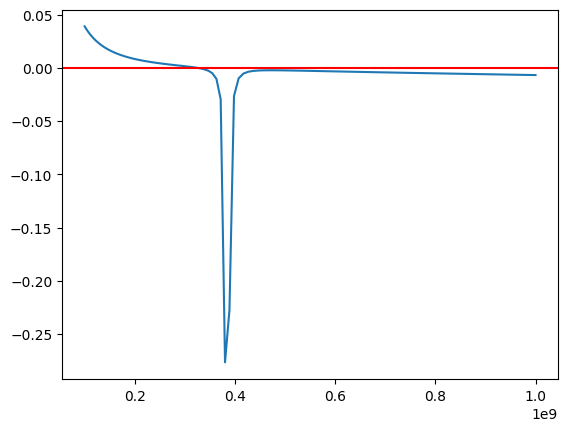

In [27]:
r = np.logspace(8,9,101 #Experimentamos para encontrar un intervalo que contenga la raiz
plt.plot(r,distancia_r(r))

plt.axhline(y = 0, color = 'red')

In [32]:
print(f'{newton(distancia_r,0.2e9)} m distancia usando newton')

326045071.6653554 m distancia usando newton


In [31]:
print(f'{newton(distancia_r,0.2e9,x1 = 0.22e9)} m distancia usando secante')

326045071.66535544 m distancia usando secante
